# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [12]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [13]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [14]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [67]:
# Add model training in here!
# Add parameters to the model!
model = RandomForestClassifier(random_state=42) 
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

### Evaluation

Evaluating how well this trained model is able to predict the values of the test dataset.

In [71]:
# Generate predictions here!

y_pred = model.predict(X_test) 


In [72]:
# Calculate performance metrics here!

# precision, recall, F-score
class_report = metrics.classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# acccuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.83      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.87      0.53      0.52      3652
weighted avg       0.90      0.90      0.86      3652

Confusion Matrix:
[[3282    4]
 [ 347   19]]
Accuracy: 0.9038882803943045


### Hyperparamater Tuning
Based on my above results I am going to tune hyperparameters like `n_estimators`, `max_depth`, and `min_samples_split` 

#### Best parameters

- Best Parameters (iteration 1): {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}

- Best Parameters (iteration 2): {'class_weight': 'balanced', 'max_depth': 40, 'min_samples_split': 5, 'n_estimators': 300}

- Best Parameters (iteration 3): {'class_weight': {0: 1, 1: 9}, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}

In [26]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid_iteration1 = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', 'balanced_subsample']
}


In [53]:
grid_search_iteration1 = GridSearchCV(RandomForestClassifier(), param_grid_iteration1, cv=5)
grid_search_iteration1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300]})

After training the model with the various parameters defined, I want check which parameters performed best during the cross-validation.

In [54]:
print("Best Parameters:", grid_search_iteration1.best_params_)

Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [56]:
# using the best model parameters to make predictions
y_pred2 = grid_search_iteration1.best_estimator_.predict(X_test)

In [57]:
# precision, recall, F-score
class_report_iteration1 = metrics.classification_report(y_test, y_pred2)
print(f"Classification Report:\n{class_report_iteration1}")

# confusion matrix
conf_matrix_iteration1 = metrics.confusion_matrix(y_test, y_pred2)
print(f"Confusion Matrix:\n{conf_matrix_iteration1}")

# acccuracy
accuracy_iteration1 = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy_iteration1}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.82      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.86      0.52      0.52      3652
weighted avg       0.90      0.90      0.86      3652

Confusion Matrix:
[[3282    4]
 [ 348   18]]
Accuracy: 0.9036144578313253


Going to rerun another param-grid to test results.

In [58]:
param_grid_iteration2 = {
    'n_estimators': [300, 500],
    'max_depth': [20, 30, 40],
    'min_samples_split': [5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [59]:
grid_search_iteration2 = GridSearchCV(RandomForestClassifier(), param_grid_iteration2, cv=5)
grid_search_iteration2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [5, 10],
                         'n_estimators': [300, 500]})

In [64]:
print("Best Parameters:", grid_search_iteration2.best_params_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 40, 'min_samples_split': 5, 'n_estimators': 300}


In [65]:
y_pred3 = grid_search_iteration2.best_estimator_.predict(X_test)

In [66]:
# precision, recall, F-score
class_report_iteration2 = metrics.classification_report(y_test, y_pred3)
print(f"Classification Report:\n{class_report_iteration2}")

# confusion matrix
conf_matrix_iteration2 = metrics.confusion_matrix(y_test, y_pred3)
print(f"Confusion Matrix:\n{conf_matrix_iteration2}")

# acccuracy
accuracy_iteration2 = metrics.accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy_iteration2}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3286
           1       0.79      0.07      0.13       366

    accuracy                           0.90      3652
   macro avg       0.85      0.53      0.54      3652
weighted avg       0.89      0.90      0.87      3652

Confusion Matrix:
[[3279    7]
 [ 340   26]]
Accuracy: 0.9049835706462213


Going to try best 2 out of three iterations and pick the utmost best parameters from there.
I keep getting poor resuklts with the 1 class in terms of recall and f1 score which makes the accuarcy of the results misleading.

To focus on the imbalanced results, I am going to pay attention to the minority churn class (1) and try custom weights

In [73]:
# to pay more attention to the minority churn class, 
# going to try custom class weights
param_grid_iteration3 = {
    'n_estimators': [300, 600],
    'max_depth': [None, 40, 60],
    'min_samples_split': [25, 20],
    'class_weight': ['balanced', 'balanced_subsample', {0: 1, 1: 9}]
}

In [74]:
grid_search_iteration3 = GridSearchCV(model, param_grid_iteration3, cv=5)
grid_search_iteration3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          {0: 1, 1: 9}],
                         'max_depth': [None, 40, 45],
                         'min_samples_split': [2, 5, 15],
                         'n_estimators': [250, 300, 350]})

In [78]:
print("Best Parameters:", grid_search_iteration3.best_params_)

Best Parameters: {'class_weight': {0: 1, 1: 9}, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [76]:
y_pred4 = grid_search_iteration3.best_estimator_.predict(X_test)

In [77]:
# precision, recall, F-score
class_report_iteration3 = metrics.classification_report(y_test, y_pred4)
print(f"Classification Report:\n{class_report_iteration3}")

# confusion matrix
conf_matrix_iteration3 = metrics.confusion_matrix(y_test, y_pred4)
print(f"Confusion Matrix:\n{conf_matrix_iteration3}")

# acccuracy
accuracy_iteration3 = metrics.accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy_iteration3}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3286
           1       0.77      0.07      0.13       366

    accuracy                           0.90      3652
   macro avg       0.84      0.54      0.54      3652
weighted avg       0.89      0.90      0.87      3652

Confusion Matrix:
[[3278    8]
 [ 339   27]]
Accuracy: 0.9049835706462213


As I run different parameter grids, I notice the accuracy getting slightly higher in decimal pints but the confusion matrix along with other report findings get a bit worse.

THe confusion matrix tells us for my final run:

- The <b>true negatives</b>, have reduced to 3278 from 3282 out of 3286. This means that out of all the negative cases (churn = 0 = retained), we predicted 3282 as negative. This is great.
- The <b>false negatives</b>, this is where I have predicted a client to retain (churn = 0) when in fact they did churn (churn = 1). This number is still quite high at 339 from 347, I still need to get the false negatives to as close to 0 as I can, so this would need to be addressed when improving the model.
- Looking at <b>false positives</b>, this is where I have predicted a client to churn when they actually didnt churn. For this value I observe 8 cases which is higher than my initial 4 cases. It's great that it is still low but I'm going to stop here to find more ways to keep this close to zero.
- With the <b>true positives</b>, I observe that in total I have 366 clients that churned in the test dataset. However, I am only able to correctly identify 27 of those 366, which is poor. Better than the original 19, but still very poor.


- Looking at the accuracy score, this is still very misleading! The accuracy score is high, but it does not tell the whole story.
- The average precision of 0.84 is not bad, but could be improved. (a little lower than initial average 0.86)
- The recall shows us that the classifier still has a very poor ability to identify positive samples. 

So I know the issue is not with my model, but instead it's with the features I am using to predict. Clearly they aren't suitable enough to predict customers churning. 


Going to evaluate the features i am using to see which ones make an impact on the model the most.

In [83]:
feature_importance = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index()

In [84]:
# top 10 most importance features
print(feature_importance.head(10))

   index                 features  importance
0      0                 cons_12m    0.054688
1     14               net_margin    0.051908
2      5  forecast_meter_rent_12m    0.051402
3      3        forecast_cons_12m    0.048628
4     11     margin_gross_pow_ele    0.047846
5     12       margin_net_pow_ele    0.046954
6      2          cons_last_month    0.037927
7     15                  pow_max    0.036839
8     10                 imp_cons    0.032828
9     49             months_activ    0.031597


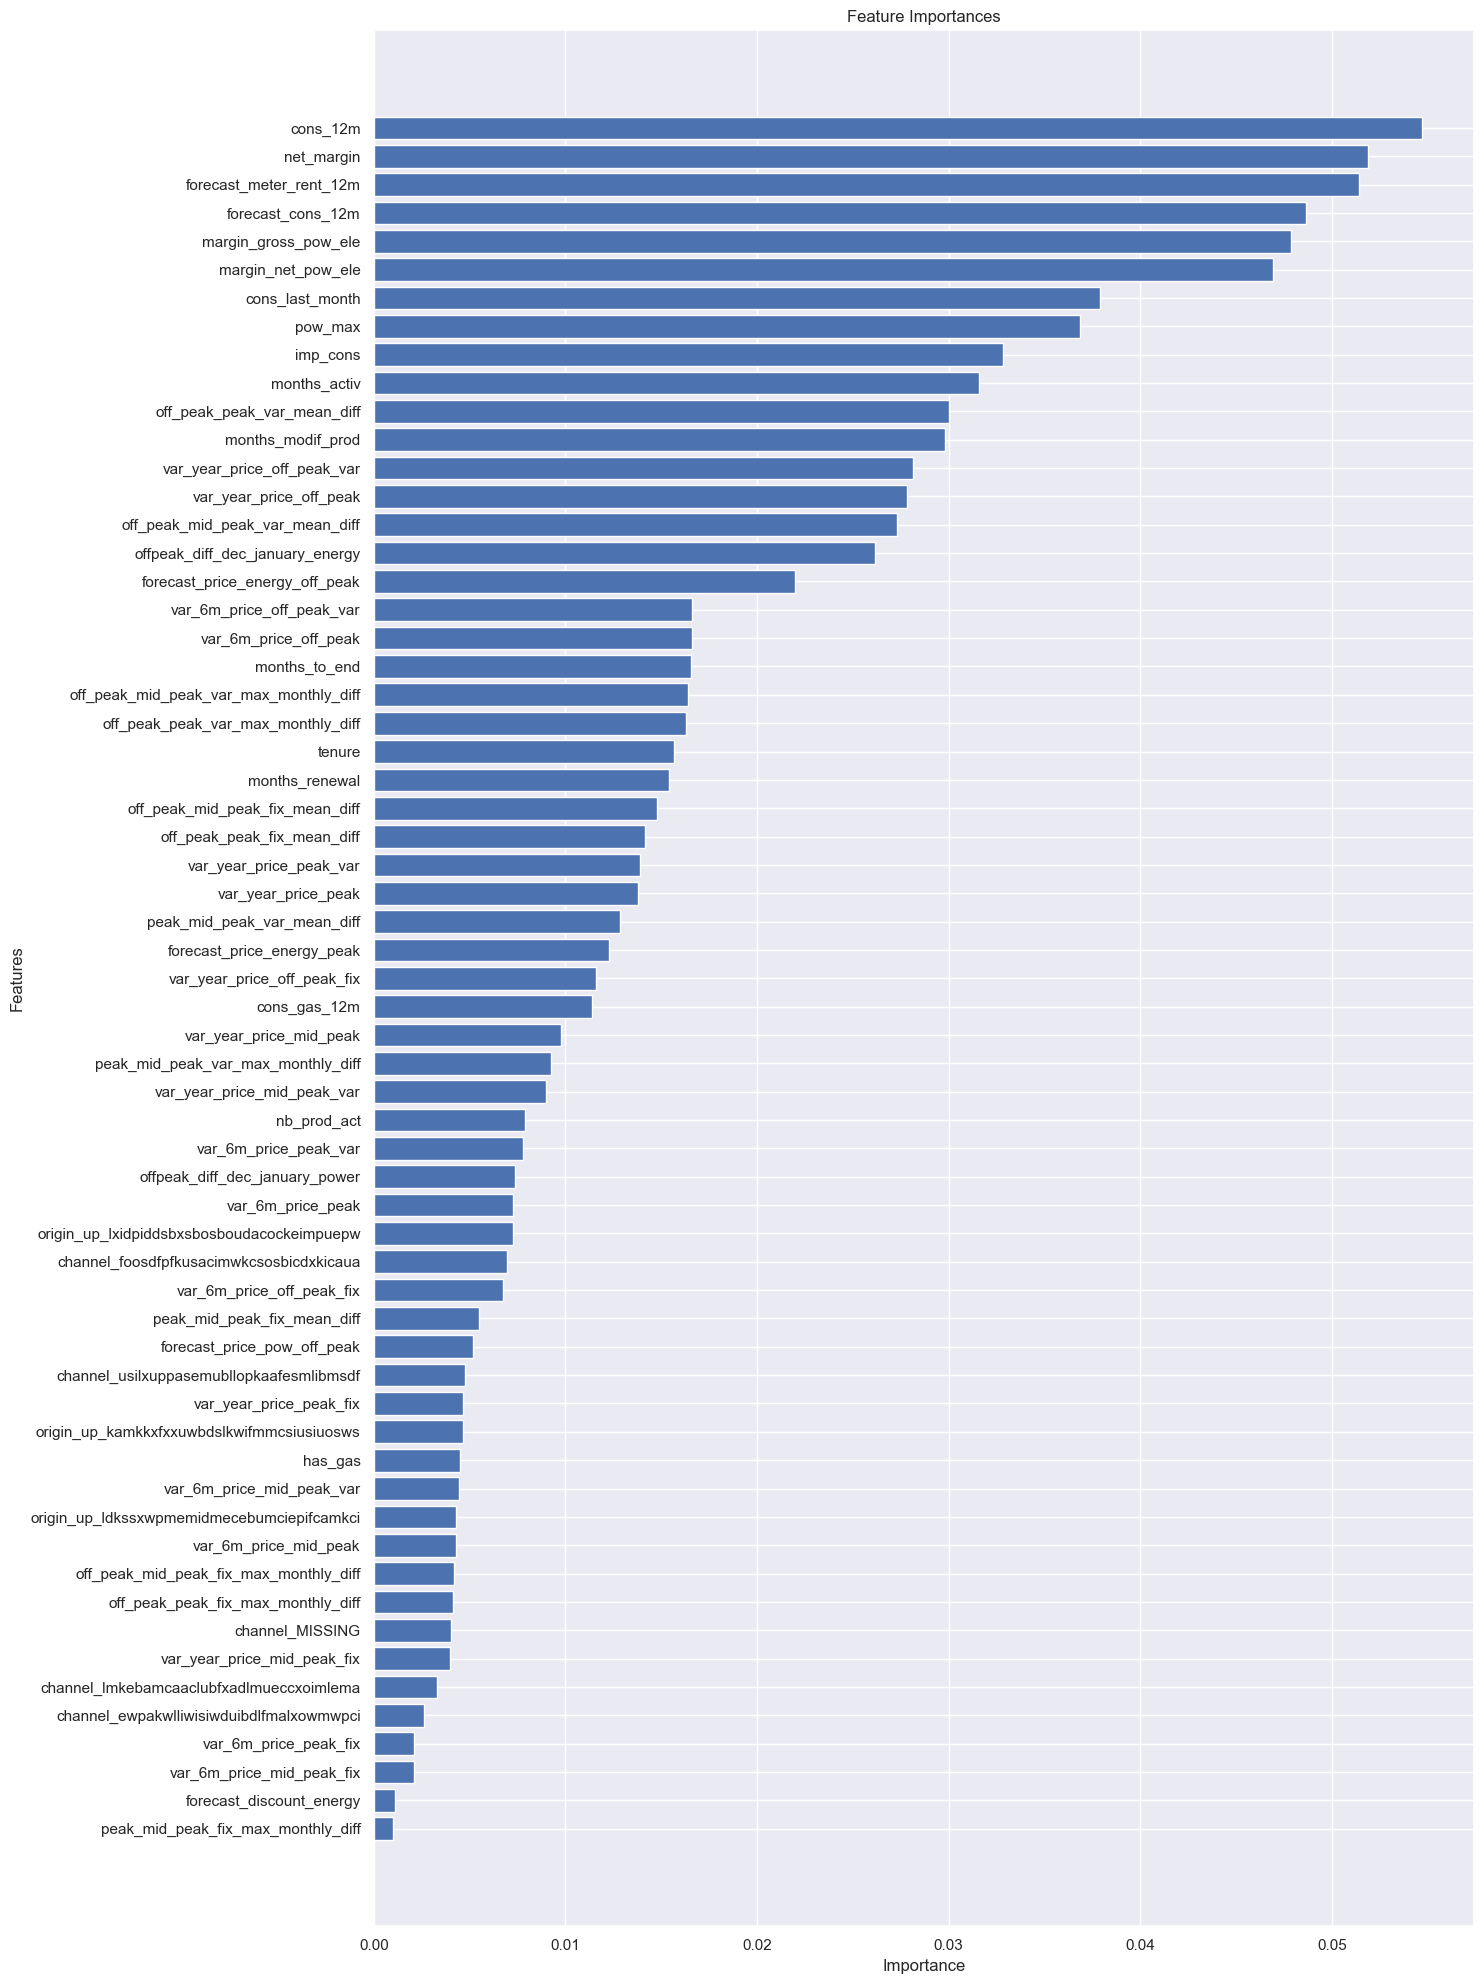

In [92]:
# Plot feature importances
plt.figure(figsize=(15, 20))
plt.barh(feature_importance['features'], feature_importance['importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # to show most important at the top
plt.tight_layout()
plt.show()

Even though my iterations show a slight increase in the accuracy, other report values (precision, recall, etc) get lower with each passing iteration. So I will be evaluating the features that are important based on the original model built.

In [121]:
# getting predictions and probabilities
prob_predictions = model.predict_proba(X_test)
probabilities = prob_predictions[:, 1]  # getting probability for class 1 = churn

In [122]:

print("Predictions and Probabilities")
print("First 5 predictions: \n", prob_predictions[:5])
# print("First 5 probabilities:", probabilities[:5])

Predictions and Probabilities
First 5 predictions: 
 [[0.84 0.16]
 [0.82 0.18]
 [0.97 0.03]
 [0.92 0.08]
 [0.97 0.03]]


In [123]:
# creating a copy of X_test to avoid modifying the original
results_df = X_test.copy()

In [124]:
print("Copy of X_test")
print(results_df.head(5))

Copy of X_test
       cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
4947   4.173390      4.193598         3.165541           3.168368   
5868   4.075036      0.000000         3.003461           3.305998   
6805   3.848435      0.000000         0.000000           2.756568   
1323   4.345433      0.000000         0.000000           3.516690   
11759  4.185655      0.000000         3.355834           3.208148   

       forecast_discount_energy  forecast_meter_rent_12m  \
4947                        0.0                 2.073828   
5868                       30.0                 1.255031   
6805                        0.0                 1.289366   
1323                        0.0                 1.304921   
11759                       0.0                 2.123067   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
4947                         0.114667                    0.099548   
5868                         0.198096                    0.000000   
68

In [125]:
results_df = results_df.reset_index()
results_df.drop(columns='index', inplace=True)

In [126]:
# adding predictions and probabilities to the dataframe
results_df['predicted_churn'] = y_pred.tolist()
results_df['churn_probability'] = probabilities.tolist()

In [127]:
print("Adding predictions and probabilities")
print(results_df.head())

Adding predictions and probabilities
   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  4.173390      4.193598         3.165541           3.168368   
1  4.075036      0.000000         3.003461           3.305998   
2  3.848435      0.000000         0.000000           2.756568   
3  4.345433      0.000000         0.000000           3.516690   
4  4.185655      0.000000         3.355834           3.208148   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 2.073828   
1                      30.0                 1.255031   
2                       0.0                 1.289366   
3                       0.0                 1.304921   
4                       0.0                 2.123067   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114667                    0.099548   
1                        0.198096                    0.000000   
2                        0.141434       

In [128]:
results_df.to_csv('my_churn_predictions.csv', index=False)

In my predictions, I see values like [0.84 0.16] and [0.97 0.03], meaning these customers have a low probability of churning (between 3% and 18%). This suggests that, in general, the model predicts most customers will likely retain (class 0). The low probabilities for churn (class 1) suggest either that <b>churn cases are less frequent</b> in the dataset or that <b>the model is biased toward predicting retention</b>. 

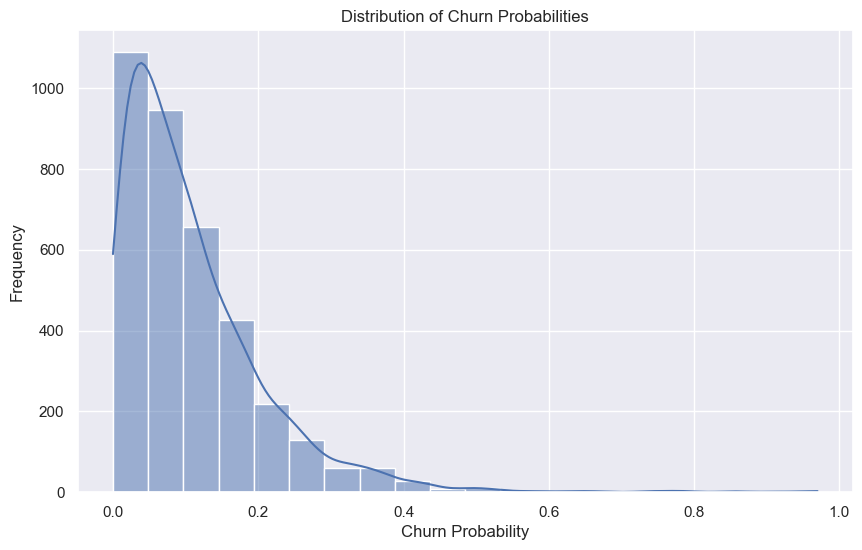

In [129]:
plt.figure(figsize=(10,6))
sns.histplot(probabilities, bins=20, kde=True)
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.show()

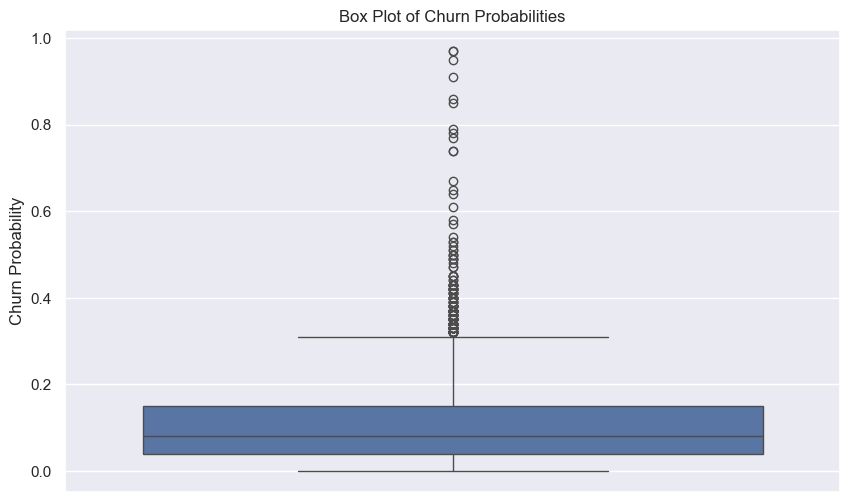

In [131]:
plt.figure(figsize=(10,6))
sns.boxplot(y=probabilities)
plt.title('Box Plot of Churn Probabilities')
plt.ylabel('Churn Probability')
plt.show()

Looking at the visualizations above, the histogram indicates that a large number of predictions have churn probabilities clustered between <b>0.0 and 0.2</b>, meaning the model is confident most customers will retain. 

To me this could mean that:
1. There are far more instances of retention than churn, which the model has learned.
2. The model may be conservative - observing less changes, defaulting to low churn probabilities to reduce misclassifications on the dominant retention class.

The line shows the smooth distribution of probabilities, helping me see if there's a secondary peak around higher churn probabilities. Since no such peak exists, it confirms the model isn’t strongly identifying high-risk churn customers, and that is something to go back and look into in my feature engineering.

Moving forward I may want to re-evaluate the model's focus on churn. To enhance the model's sensitivity to churn cases by adjusting the class weights (increase weight for class 1). [more than I already tried above]

In summary, the histogram and boxplot reveals that my model heavily favors retention, which is informative as class imbalance (observed from the FN in confusion matrix, low recall for churn, etc) is impacting its ability to identify churn risks effectively.